In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
# Model
from sklearn.linear_model import ElasticNetCV, ElasticNet
# Data process
from sklearn.model_selection import KFold, train_test_split
# Metrics
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix
# Feature Selectioon
from sklearn.feature_selection import RFECV
# Decision Tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [5]:
# データ読み込み
df = pd.read_csv('../data/day2_categorical.csv')
df.head()

,state,category,main_category,currency,country,days,goal
0,False,Poetry,Publishing,GBP,GB,58.0,1000.0
1,False,Narrative Film,Film & Video,USD,US,59.0,30000.0
2,False,Narrative Film,Film & Video,USD,US,44.0,45000.0
3,False,Music,Music,USD,US,29.0,5000.0
4,False,Film & Video,Film & Video,USD,US,55.0,19500.0


## DecisionTree

In [19]:
train_col = ["category", 'main_category', 'currency', 'country']
# objectをカテゴリカルに変換
cate_num_df = pd.DataFrame()
for column in train_col:
    labels, uniques = pd.factorize(df[column])
    cate_num_df[column] = labels

In [22]:
x_df = pd.concat([cate_num_df, df[['days', 'goal']]], axis=1)
x_df.head()

,category,main_category,currency,country,days,goal
0,0,0,0,0,58.0,1000.0
1,1,1,1,1,59.0,30000.0
2,1,1,1,1,44.0,45000.0
3,2,2,1,1,29.0,5000.0
4,3,1,1,1,55.0,19500.0


In [27]:
X = x_df.values
y = df["state"].values * 1

test_size = 0.2        # 全データのうち、何%をテストデータにするか（今回は20%に設定）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1234) # ホールドアウト法を実行（テストデータはランダム選択）
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

clf = DecisionTreeClassifier(criterion="gini", max_depth=None, min_samples_split=3, min_samples_leaf=3, random_state=1234)
clf = clf.fit(X_train, y_train)
print("score=", clf.score(X_test, y_test))
print(clf.predict(X_test)) #予測したい場合

(302928, 6)

(75733, 6)

(302928,)

(75733,)

score= 0.6709756645055656
[1 0 0 ... 1 0 0]


In [ ]:
train_col = ["category", 'main_category', 'currency', 'country']


## RandomForest

In [87]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

score= 0.685407946337792
[0.2133404  0.08923764 0.01880269 0.02684213 0.21445709 0.43732005]


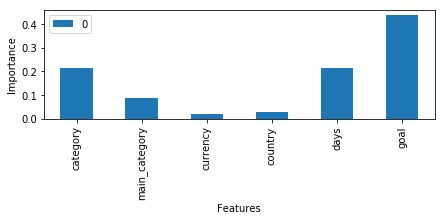

In [29]:
clf = RandomForestClassifier(n_estimators=10, max_depth=None, criterion="gini",
                                                 min_samples_leaf=2, min_samples_split=2, random_state=1234)
clf.fit(X_train, y_train)
print("score=", clf.score(X_test, y_test))

# 説明変数の重要度を出力する
# scikit-learnで算出される重要度は、ある説明変数による不純度の減少量合計である。
print(clf.feature_importances_)
pd.DataFrame(clf.feature_importances_, index=["category", 'main_category', 'currency', 'country', 'days', 'goal']).plot.bar(figsize=(7,2))
plt.ylabel("Importance")
plt.xlabel("Features")
plt.show()

# currecny countryを除去

In [40]:
new_df = x_df.loc[:, ['category', 'main_category', 'days', 'goal']]
new_df.head()

,category,main_category,days,goal
0,0,0,58.0,1000.0
1,1,1,59.0,30000.0
2,1,1,44.0,45000.0
3,2,2,29.0,5000.0
4,3,1,55.0,19500.0


In [41]:
X = new_df.values
y = df["state"].values * 1

test_size = 0.2        # 全データのうち、何%をテストデータにするか（今回は20%に設定）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1234) # ホールドアウト法を実行（テストデータはランダム選択）
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

clf = DecisionTreeClassifier(criterion="gini", max_depth=None, min_samples_split=3, min_samples_leaf=3, random_state=1234)
clf = clf.fit(X_train, y_train)
print("score=", clf.score(X_test, y_test))
print(clf.predict(X_test)) #予測したい場合

(302928, 4)

(75733, 4)

(302928,)

(75733,)

score= 0.6730091241598775
[1 0 0 ... 1 0 0]


## RandomForest

score= 0.6806940171391599
[0.22155233 0.08950338 0.23602143 0.45292285]


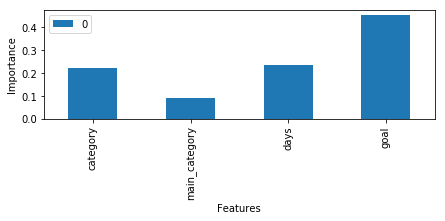

In [43]:
clf = RandomForestClassifier(n_estimators=10, max_depth=None, criterion="gini",
                                                 min_samples_leaf=2, min_samples_split=2, random_state=1234)
clf.fit(X_train, y_train)
print("score=", clf.score(X_test, y_test))

# 説明変数の重要度を出力する
# scikit-learnで算出される重要度は、ある説明変数による不純度の減少量合計である。
print(clf.feature_importances_)
pd.DataFrame(clf.feature_importances_, index=["category", 'main_category', 'days', 'goal']).plot.bar(figsize=(7,2))
plt.ylabel("Importance")
plt.xlabel("Features")
plt.show()

# onehotのデータを読み込み

In [44]:
onehot_df = pd.read_csv('../data/day2_onehot.csv')
onehot_df.head()

,state,category_Academic,category_Accessories,category_Action,category_Animation,category_Anthologies,category_Apparel,category_Apps,category_Architecture,category_Art,...,currency_GBP,currency_USD,currency_others,country_AU,country_CA,country_GB,country_US,country_others,days,goal
0,False,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,58.0,1000.0
1,False,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,59.0,30000.0
2,False,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,44.0,45000.0
3,False,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,29.0,5000.0
4,False,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,55.0,19500.0


In [50]:
onehot_df.columns[1:]

Index(['category_Academic', 'category_Accessories', 'category_Action',
       'category_Animation', 'category_Anthologies', 'category_Apparel',
       'category_Apps', 'category_Architecture', 'category_Art',
       'category_Art Books',
       ...
       'currency_GBP', 'currency_USD', 'currency_others', 'country_AU',
       'country_CA', 'country_GB', 'country_US', 'country_others', 'days',
       'goal'],
      dtype='object', length=119)

In [48]:
X = onehot_df.drop(['state'], axis=1).values
y = df["state"].values * 1

test_size = 0.2        # 全データのうち、何%をテストデータにするか（今回は20%に設定）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1234) # ホールドアウト法を実行（テストデータはランダム選択）
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

clf = DecisionTreeClassifier(criterion="gini", max_depth=None, min_samples_split=3, min_samples_leaf=3, random_state=1234)
clf = clf.fit(X_train, y_train)
print("score=", clf.score(X_test, y_test))
print(clf.predict(X_test)) #予測したい場合

(302928, 119)

(75733, 119)

(302928,)

(75733,)

score= 0.6714774272774088
[1 0 0 ... 1 0 0]


## RandomForest

score= 0.6890523285753899
[5.37252168e-04 9.52244739e-04 8.03240046e-04 8.25250744e-04
 2.18169584e-03 3.10600444e-03 7.53521636e-03 4.44910272e-04
 1.06181878e-03 2.51472192e-03 1.09131950e-03 2.94737405e-03
 1.23818829e-03 3.30749239e-03 2.63525682e-03 4.40045900e-04
 4.90000492e-03 3.14133071e-03 1.73609348e-03 1.10682904e-03
 4.48735497e-03 8.25141748e-04 9.28124641e-04 2.37445886e-03
 9.06038046e-04 4.57105347e-04 1.45834441e-03 4.74705747e-04
 9.70101101e-04 5.39950306e-04 3.39935514e-04 1.15166305e-03
 1.13515073e-03 3.49947562e-03 1.54957634e-03 5.55108174e-04
 9.80736237e-04 1.20182172e-03 5.32605979e-04 9.60051592e-04
 1.20764741e-03 7.61473425e-04 1.96677705e-03 1.55696286e-03
 7.87627600e-03 6.43509170e-04 1.46071006e-03 6.66916426e-03
 1.39206545e-03 3.81544904e-04 8.94907846e-04 6.83826700e-04
 7.59918882e-04 2.43038919e-03 2.78084753e-03 9.05640026e-04
 1.57040412e-03 1.75482534e-03 9.49685949e-04 1.05080339e-03
 6.40629381e-04 1.80424945e-03 6.58834867e-04 1.08250105e-0

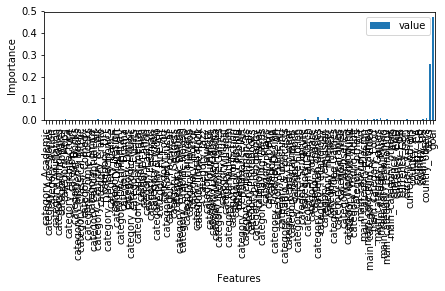

In [78]:
clf = RandomForestClassifier(n_estimators=100, max_depth=None, criterion="gini",
                                                 min_samples_leaf=2, min_samples_split=2, random_state=1234, )
clf.fit(X_train, y_train)
print("score=", clf.score(X_test, y_test))

# 説明変数の重要度を出力する
# scikit-learnで算出される重要度は、ある説明変数による不純度の減少量合計である。
print(clf.feature_importances_)
importance_label = pd.DataFrame(clf.feature_importances_, index=onehot_df.columns[1:], columns=['value'])
importance_label.plot.bar(figsize=(7,2))
plt.ylabel("Importance")
plt.xlabel("Features")
plt.show()

In [76]:
importance_label

,value
category_Academic,0.000516
category_Accessories,0.000832
category_Action,0.000846
category_Animation,0.000845
category_Anthologies,0.001997
category_Apparel,0.003367
category_Apps,0.006123
category_Architecture,0.000456
category_Art,0.000933
category_Art Books,0.002157


In [77]:
importance_label.value.sort_values(ascending=False)

goal                         0.478468
days                         0.260309
category_Tabletop Games      0.014296
category_Theater             0.011037
main_category_Technology     0.010902
main_category_Music          0.010822
country_others               0.009184
category_Shorts              0.007578
category_Indie Rock          0.007511
country_US                   0.006853
category_others              0.006432
category_Country & Folk      0.006282
category_Apps                0.006123
category_Web                 0.005674
category_Hip-Hop             0.005560
main_category_Fashion        0.005511
category_Video Games         0.005132
main_category_Food           0.004866
category_Dance               0.004354
category_Classical Music     0.004072
main_category_Games          0.003981
main_category_others         0.003824
currency_USD                 0.003761
category_Crafts              0.003687
category_Music               0.003661
category_Fiction             0.003541
category_App

In [79]:
importance_label.value.sort_values(ascending=False)

goal                         0.474176
days                         0.257150
category_Tabletop Games      0.014201
main_category_Music          0.012819
category_Theater             0.010997
country_others               0.009128
main_category_Technology     0.007962
category_Hip-Hop             0.007876
category_Shorts              0.007850
category_Apps                0.007535
country_US                   0.007334
category_Indie Rock          0.006669
category_others              0.006363
category_Web                 0.006092
main_category_Fashion        0.005777
category_Country & Folk      0.004900
main_category_Food           0.004597
category_Video Games         0.004590
category_Dance               0.004487
currency_USD                 0.004367
main_category_Games          0.003918
category_Fiction             0.003499
main_category_others         0.003495
category_Comic Books         0.003307
category_Crafts              0.003141
category_Apparel             0.003106
category_Cla

# Adaboost

score= 0.665324231180595
[1.12526558e-04 1.80866248e-04 1.13615348e-04 2.48529163e-04
 2.63147891e-04 6.75892224e-04 4.04964157e-04 9.31762718e-05
            nan 8.49865121e-04 7.93611007e-04 2.00207004e-04
 2.97569556e-04 3.78135342e-04 3.92853055e-04 1.54157695e-04
 6.49252491e-04 7.29212103e-04 1.56450667e-04            nan
 4.57473540e-04 2.95965663e-04 1.59049649e-04 5.84751640e-04
 2.37735283e-04 1.82992258e-04 2.73212091e-04 1.13172560e-04
 1.98622845e-04 1.07950107e-04 1.17396906e-04 4.52351332e-04
 1.98631558e-04 3.83822486e-04 9.42235896e-04 1.30174723e-04
 3.34350564e-04 1.06303615e-04 1.16624487e-04 2.35234494e-04
 7.22459487e-04 2.01655581e-04 2.84022985e-04 2.64692830e-04
 9.68510446e-04 1.80186250e-04 2.78607255e-04 6.44394989e-04
 1.76926377e-04 8.96344922e-05            nan 9.39667140e-05
 2.39489933e-04 1.60446741e-04 3.51715401e-04 1.75624880e-04
 1.15570396e-03 3.76055111e-04 2.80027816e-04 1.36506954e-04
 2.29858339e-04 6.94741878e-04 2.04696423e-04 2.15486444e-04

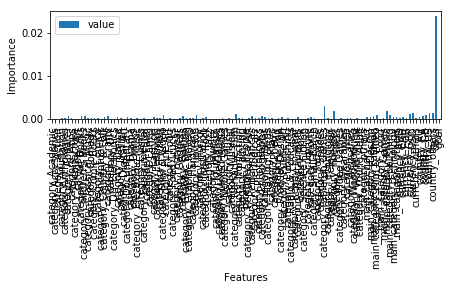

In [86]:
clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10, algorithm='SAMME.R')
clf.fit(X_train, y_train)
print("score=", clf.score(X_test, y_test))

# 説明変数の重要度を出力する
# scikit-learnで算出される重要度は、ある説明変数による不純度の減少量合計である。
print(clf.feature_importances_)
importance_label = pd.DataFrame(clf.feature_importances_, index=onehot_df.columns[1:], columns=['value'])
importance_label.plot.bar(figsize=(7,2))
plt.ylabel("Importance")
plt.xlabel("Features")
plt.show()

# GradientBoosting

score= 0.6529518175696196
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.40248762e-02 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+0

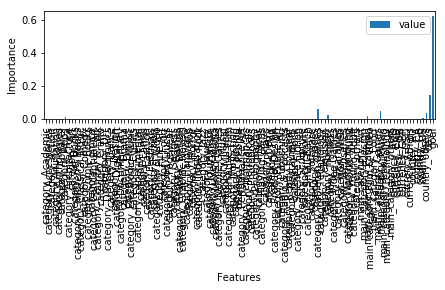

In [89]:
clf = GradientBoostingClassifier(n_estimators=10, loss='deviance')
clf.fit(X_train, y_train)
print("score=", clf.score(X_test, y_test))

# 説明変数の重要度を出力する
# scikit-learnで算出される重要度は、ある説明変数による不純度の減少量合計である。
print(clf.feature_importances_)
importance_label = pd.DataFrame(clf.feature_importances_, index=onehot_df.columns[1:], columns=['value'])
importance_label.plot.bar(figsize=(7,2))
plt.ylabel("Importance")
plt.xlabel("Features")
plt.show()